In [20]:
import os

os.environ["OMP_NUM_THREADS"] = "1"


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [3]:
data=pd.read_csv("D:/intern/task 2/Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

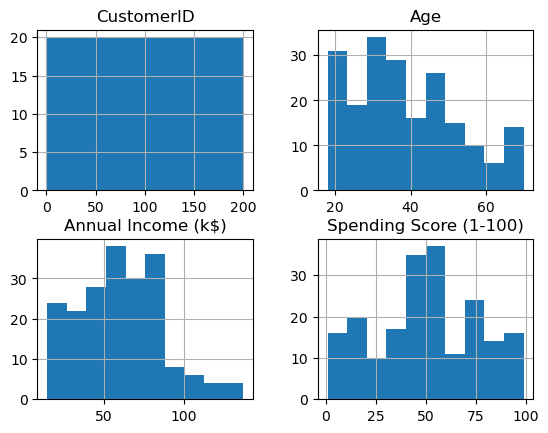

In [8]:
data.hist()

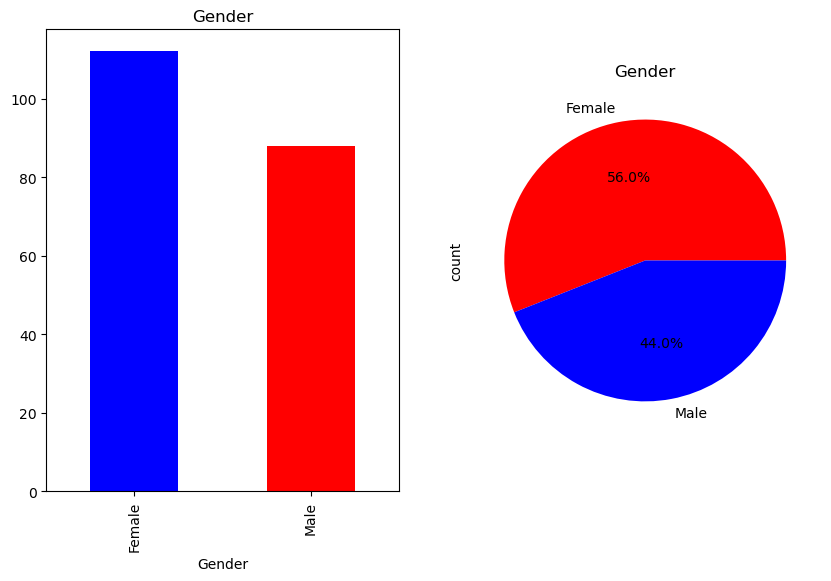

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

count = data['Gender'].value_counts()

# Plotting bar plot
count.plot(kind='bar', ax=axs[0], color=['blue', 'red'])  # Change colors as per your preference
axs[0].set_title('Gender')

# Plotting pie chart
count.plot(kind='pie', ax=axs[1], autopct='%1.1f%%', colors=['red', 'blue'])  # Change colors as per your preference
axs[1].set_title('Gender')

plt.show()


C:\Users\menna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


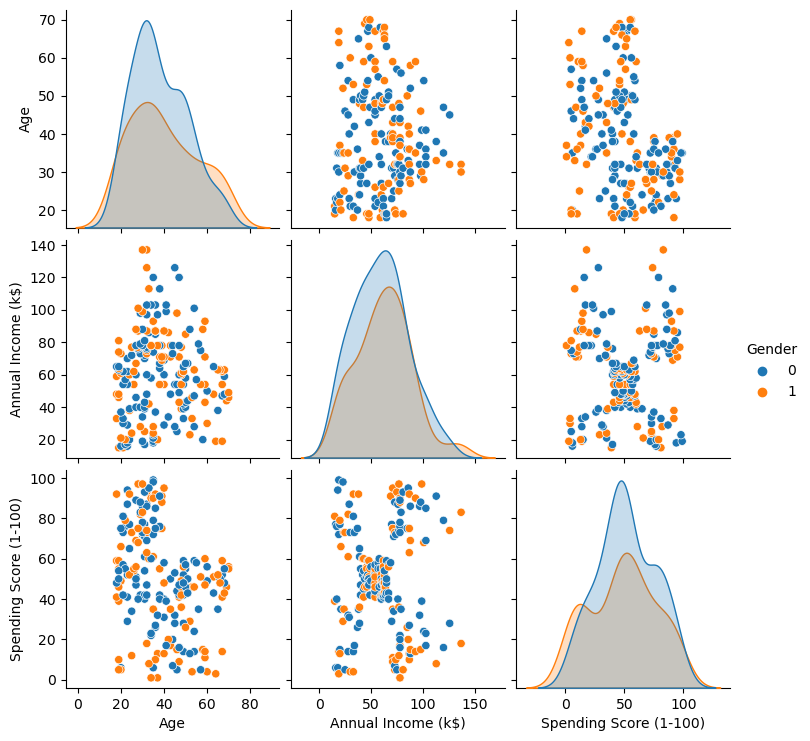

In [19]:
sns.pairplot(data, hue='Gender')

<Axes: >

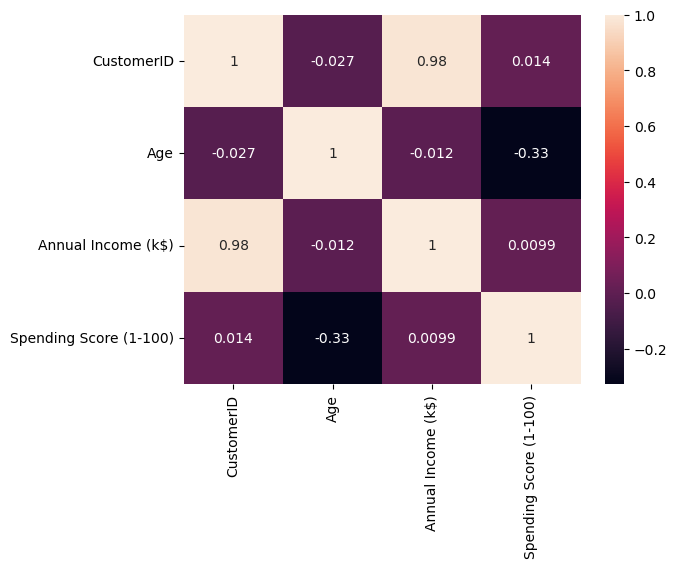

In [11]:
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)

In [12]:
gender_encoder = LabelEncoder()

In [13]:
gender_encoded = gender_encoder.fit_transform(data['Gender'])

In [14]:
data['Gender'] = gender_encoded
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
data.drop(columns = ['CustomerID'], inplace=True)

In [16]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [24]:
n_init = 10
Kmeans_model = KMeans(n_clusters=5, n_init=n_init, random_state=42)
Kmeans_model.fit(X=data)


KMeans(n_clusters=5, n_init=10, random_state=42)

In [28]:
data['cluster'] = Kmeans_model.predict(data)

In [30]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


In [22]:
inertia = []
silhoutte_scores = [0]
for i in range(1, 16):
    n_init = 10
    temp_model = KMeans(n_clusters=i, n_init=n_init, random_state=42)
    temp_model.fit(data)
    inertia.append(temp_model.inertia_)
    if(i >1):
        silhoutte_scores.append(silhouette_score(data, temp_model.labels_, metric='euclidean'))

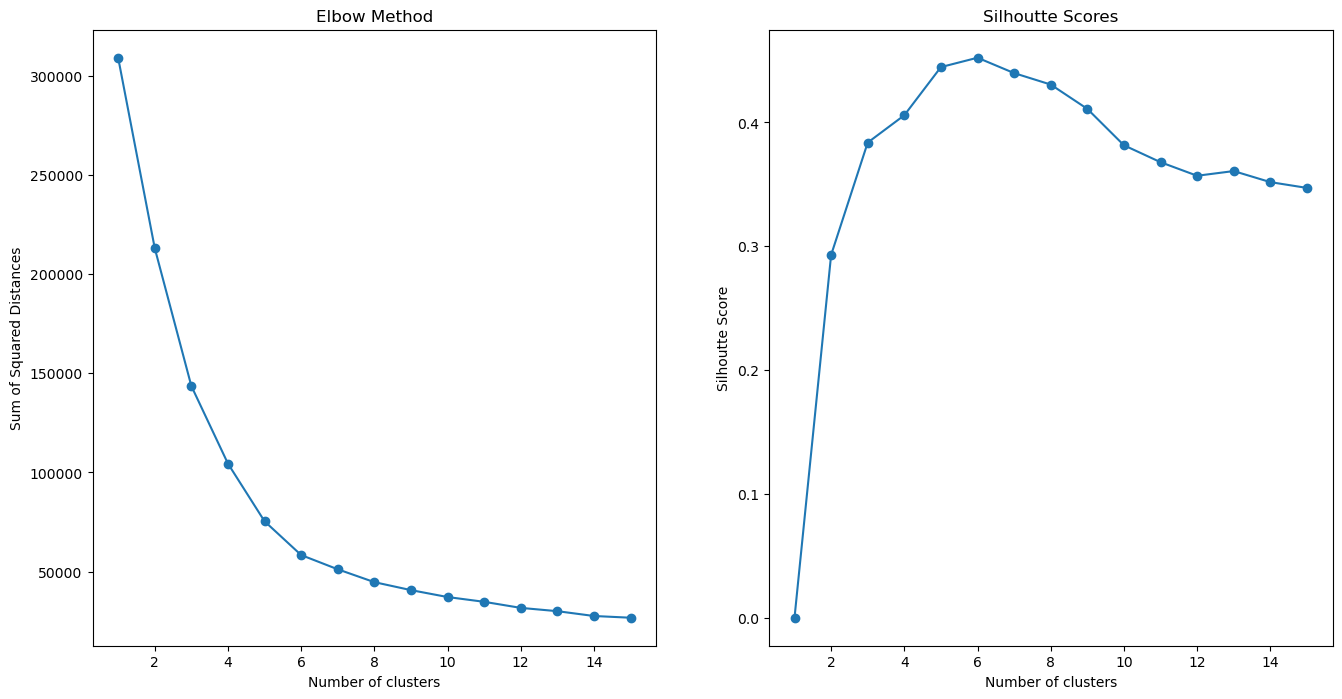

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(range(1, 16), inertia, marker='o')  # Specify ax=ax[0] here
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Sum of Squared Distances')
ax[0].set_title('Elbow Method')


ax[1].plot(range(1, 16), silhoutte_scores, marker='o')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhoutte Score')
ax[1].set_title('Silhoutte Scores')

plt.show()

In [34]:
inertia

[309151.815,
 213144.3406649616,
 143611.96805569273,
 104482.01669558512,
 75399.61541401484,
 58370.14871502766,
 51185.3490750825,
 44700.99599985225,
 40685.207909464,
 37198.74528624632,
 34785.5977978186,
 31727.880863580867,
 30065.36541869895,
 27634.59291549954,
 26764.205598035438]

In [35]:
silhoutte_scores

[0,
 0.292973669733615,
 0.38375702762970426,
 0.40584125282206673,
 0.44473703994455477,
 0.452303290263438,
 0.4398813867650373,
 0.4306337061419302,
 0.4110045397856517,
 0.3816083600660826,
 0.3679340674212853,
 0.3569694962701038,
 0.360757510383641,
 0.3518284493718032,
 0.34715650241826845]

In [23]:
best_model=KMeans(n_clusters=6, n_init=100, random_state=42)
best_model.fit(data)

KMeans(n_clusters=6, n_init=100, random_state=42)

In [37]:
data['cluster'] = best_model.predict(data)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,5
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,5


In [38]:
best_model.inertia_

58370.14871502766

In [40]:
silhouette_score(data, best_model.labels_, metric='euclidean')

0.45382447211876453

In [42]:
clusters = data['cluster'].value_counts()
clusters

cluster
0    45
4    39
3    38
1    35
2    22
5    21
Name: count, dtype: int64

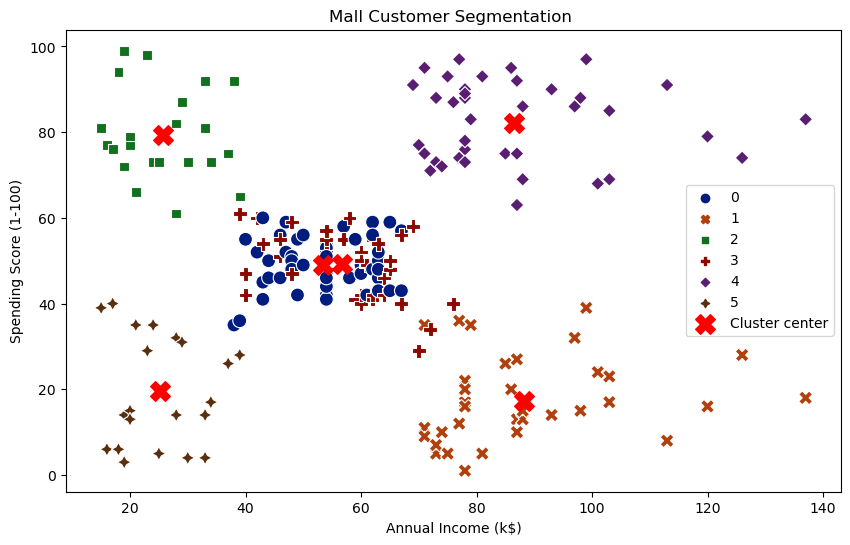

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster',style='cluster', data=data, s=100, palette='dark')
plt.scatter(best_model.cluster_centers_[:, 2], best_model.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Cluster center')
plt.title('Mall Customer Segmentation ')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()